We assume here that $1-\beta \leq 0.00249 \tfrac{\log d}{\sqrt{d}}$

In [189]:
assump=CBF((1-(0.00249*log(400000))/sqrt(400000)))
assump2=CBF(assump^2)
denom_b=CBF((3-assump)*(4-assump))

print('beta >',assump)
print('beta^2 >', assump2)
print('(3-beta)(4-beta)<',denom_b)

beta > [0.999949215311211 +/- 3.93e-16]
beta^2 > [0.999898433201507 +/- 5.09e-16]
(3-beta)(4-beta)< [6.00025392602303 +/- 6.68e-15]


In [190]:
c1=CBF((2-assump)^2)
c2=CBF((3-assump)^2)

print(c1,'and',c2)

[1.000101571956662 +/- 5.06e-16] and [4.00020314133424 +/- 4.63e-15]


In [191]:
#We take the center of the complex ball on the square of the lower bound of \beta
c=assump2.mid()
c11=c1.mid()
c22=c2.mid()

#J1 using complex ball fields
J1=CBF(integral(abs(x*zeta(1-I*x))/sqrt((c+x^2)*(c11+x^2)*(c22+x^2)), x,-3,3)/(2*pi))
J1

[0.196857705981812 +/- 1.17e-16]

In [192]:
#J2 using complex ball fields

J2=CBF(integral(abs(x*zeta(1-I*x)*log(e*(abs(x)+14/5)))/sqrt((c+x^2)*(c11+x^2)*(c22+x^2)), x,-3,3)/(2*pi))
J2

[0.451895312454907 +/- 2.28e-16]

In [193]:
#J3 using complex ball fields

J3=CBF(integral(x*log(x)/sqrt((c+x^2)*(c11+x^2)*(c22+x^2)), x,3,Infinity)*(0.8/sqrt(2*pi)))
J3

[0.208817293649116 +/- 6.32e-16]

In [194]:
#J4 using complex ball fields

J4=CBF(integral((x*log(x)*log(e*(x+14/5)))/sqrt((c+x^2)*(c11+x^2)*(c22+x^2)), x,3,Infinity)*(0.8/sqrt(2*pi)))
J4

[0.818128125470813 +/- 9.00e-16]

In [195]:
#The coefficients in the upper bound of J

J1J3=J1+J3
J2J4=J2+J4
print('J1+J3 is equal to',J1J3)
print('J2+J4 is equal to',J2J4)

J1+J3 is equal to [0.405674999630928 +/- 6.67e-16]
J2+J4 is equal to [1.27002343792572 +/- 1.18e-15]


In [202]:
#The constant terms in the upper bound of J

upperJ=CBF((J1J3+(J2J4/log(400000)))/(2*pi)); upperJ

[0.080235160805451 +/- 1.43e-16]

In [203]:
upperJ2=CBF(2*upperJ); upperJ2

[0.160470321610902 +/- 2.86e-16]

In [204]:
t1=CBF(1/(denom_b))
t3=CBF(0.00249)*upperJ2

print(t1, t3)

[0.166659613464526 +/- 5.33e-16] [0.000399571100811146 +/- 7.03e-19]


In [205]:
deno=CBF(22.0468045699745)

In [206]:
print(t1/deno, t3/deno)

[0.00755935459651595 +/- 7.36e-18] [1.81237648087706e-5 +/- 5.21e-20]


In [200]:
CBF(0.00249)*upperJ2/deno

[1.81237648087706e-5 +/- 5.21e-20]

In [201]:
CBF(0.00249)*upperJ2/(16*deno)

[1.13273530054816e-6 +/- 2.52e-21]

### case 2

In [224]:
def Sigma(l):
    return CBF(2*sum([1./k for k in [1..l] if is_prime_power(k)]))

In [156]:
Sigma(16)

[3.785267510267510 +/- 2.62e-16]

In [157]:
CBF(e*Sigma(16))

[10.28942388901658 +/- 5.82e-15]

In [158]:
def Err0(l):
    return CBF(3.6/log(l)^2)

In [159]:
Err0(16)

[0.468308020726262 +/- 8.15e-16]

In [160]:
CBF(1+2*log(2)+Err0(16))

[2.85460238184615 +/- 3.48e-15]

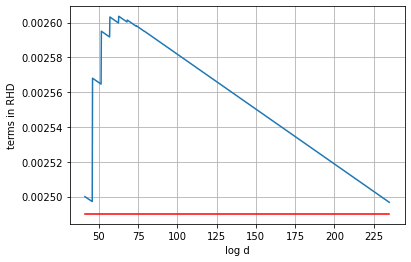

In [248]:
# case 2 - f(d)=16
import numpy as np
import matplotlib.pyplot as plt

#f(d)=20

def poscase2(t):
    k=ceil((t-log(4))/(2*log(16)))
    D2=0.02976*(1+k)/(1+k-3.78526)*(10.28942/k)^k/sqrt(k)
    return N((0.00755-0.0000018*t)/(2.85460+D2))

Num=1000
x=np.linspace(41,235,num=Num)
y=[]
for t in x:
    z=poscase2(t)
    y.append(z)
w=0.00249*np.ones(Num)
plt.plot(x,y)
plt.plot(x,w,'-',color='red')
plt.ylabel('terms in RHD')
plt.xlabel('log d')
plt.grid()
plt.show()

### case 3

In [243]:
w=CBF((230-log(4))/6); w

[38.1022842731467 +/- 3.48e-14]

In [244]:
CBF((3*w)/log(w))

[31.4006158437368 +/- 5.95e-14]

In [246]:
esk=CBF((e*log(w)*(log(log(w))+CBF(2.0695)))/(3*w)); esk

[0.291002725540981 +/- 8.52e-16]

In [247]:
k_s=CBF(1/(1-(esk/e))); k_s

[1.11988844842406 +/- 5.00e-15]

In [230]:
s0=13.40285

In [231]:
T=CBF(1/s0)*CBF(k_s*(1/sqrt(2*pi*32))*esk^32); T

[4.121150704585e-20 +/- 4.70e-33]

In [233]:
d=CBF(1)+CBF(2*log(2))+CBF(3.6)/(log(z))^2; d

[2.65795974108724 +/- 2.67e-15]

In [236]:
ratio=CBF(0.00249)*upperJ2/(deno); ratio

[1.81237648087706e-5 +/- 5.21e-20]

In [242]:
upperJ2/deno

[0.0072786204051287 +/- 5.51e-17]

In [238]:
tt3=CBF(ratio*(6*z+log(4))/z); tt3

[0.000109401994802580 +/- 6.24e-19]

In [241]:
#Getting the contradiction 

(CBF(0.00755)-tt3)/d

[0.00279936444867063 +/- 3.27e-18]